Поиск выбросов

In [69]:
import pandas as pd

path = "udt_base.csv"

df = pd.read_csv(path)

# Вычисление границ IQR
Q1, Q3 = df['price_for_m'].quantile([0.25, 0.75])
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound =  Q3 + 1.5 * IQR

# Отсеивание выбросов
df_cleaned = df[(df['price_for_m'] >= lower_bound) & (df['price_for_m'] <= upper_bound)]

df_cleaned.to_csv(path, index=False, encoding='utf-8-sig')
print(f'\n\nData has {df.shape[0]} rows , {df.shape[1]} columns.')



Data has 7275 rows , 10 columns.


Информация о базе

In [70]:
import pandas as pd

path = "udt_base.csv"

df = pd.read_csv(path)
df.describe()

,rooms_count,total_meters,floor,floors_count,price,price_for_m
count,7275.000000,7275.000000,7275.000000,7275.000000,7.275000e+03,7275.000000
mean,2.054433,56.911953,8.209210,15.912990,1.203843e+07,210227.978007
std,1.050187,27.125548,6.409815,7.529375,7.842668e+06,54124.541752
min,1.000000,6.050000,1.000000,1.000000,7.461400e+05,71539.000000
25%,1.000000,38.610000,3.000000,9.000000,8.000000e+06,170170.500000
50%,2.000000,50.000000,6.000000,17.000000,1.005405e+07,201900.000000
75%,3.000000,66.000000,12.000000,22.000000,1.299000e+07,244252.000000
max,5.000000,349.000000,63.000000,64.000000,1.000000e+08,355140.000000


Взаимосвязи

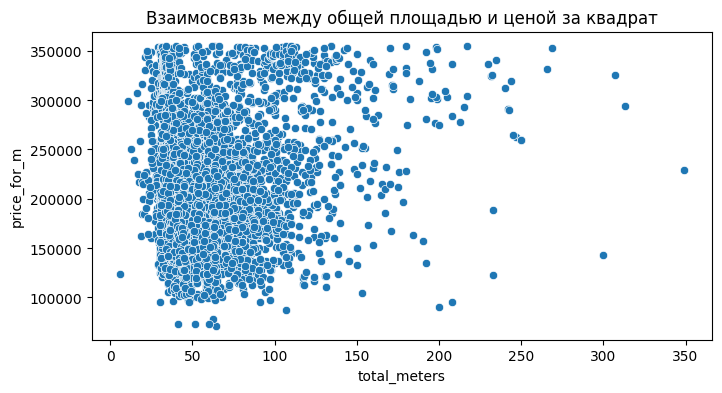

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

column = 'total_meters'

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x=column, y='price_for_m')
plt.title(f'Взаимосвязь между общей площадью и ценой за квадрат')
plt.xlabel(column)
plt.ylabel('price_for_m')
plt.show()

Корреляция

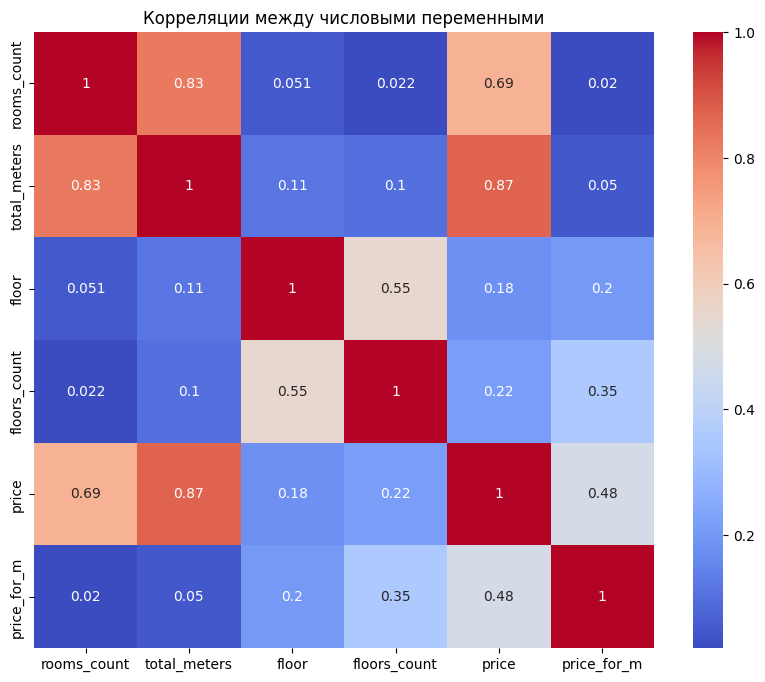

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

path = "udt_base.csv"
df = pd.read_csv(path)

numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляции между числовыми переменными')
plt.show()

Графики

Text(0, 0.5, 'Частота')

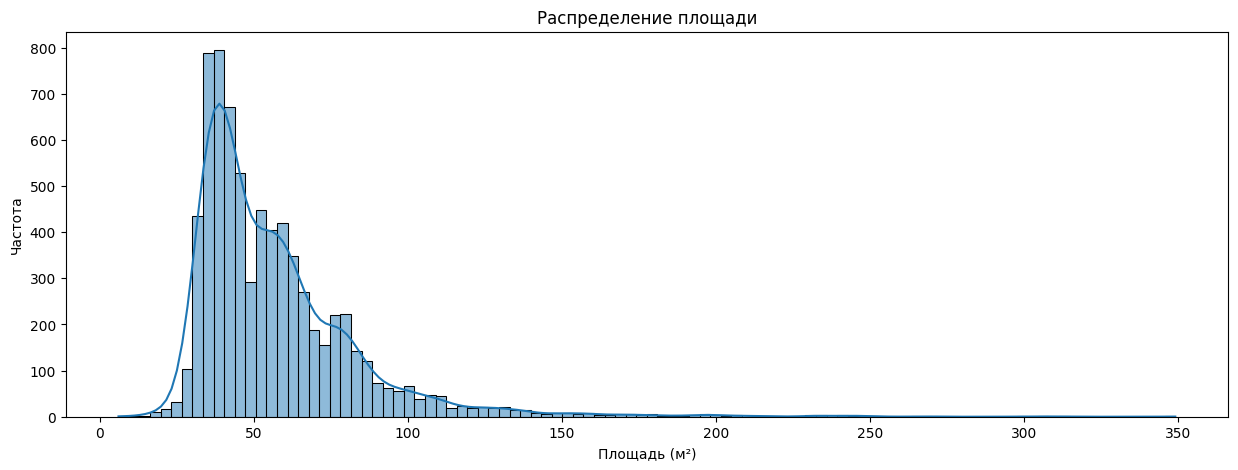

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.histplot(df['total_meters'], bins=100, kde=True)
plt.title('Распределение площади')
plt.xlabel('Площадь (м²)')
plt.ylabel('Частота')
